<a href="https://colab.research.google.com/github/Bakarime27/app-sante-public/blob/main/prediction_sea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Anticipez les besoins en consommation de bâtiments**
Ce projet a pour but d'aider la ville de seattle a atteindre son objectif de ville neutre en émissions de carbone en 2050. En effet la ville s'intéresse de près à la consommation et aux émissions des bâtiments non destinés à l'habitation.  

Des relevés minutieux ont été effectués par les agents de la ville en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous devons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.  

La première partie nous a permis de réaliser un nettoyage des données et une analyse exploratoire.
Dans cette seconde partie, nous allons réaliser les diverses modélisations grâce à des approches linéaires et non-linéaire afin de prédire les émissions de CO2 et les consommations d'énergie des bâtiments.

### **1.&nbsp;Preprocessing des données**

### **1.1.&nbsp; Chargement des données**

In [1]:
from google.colab import drive
#drive.mount("/gdrive", force_remount=True)
#drive.flush_and_unmount()
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Datasets
%ls

Mounted at /gdrive
/gdrive/MyDrive/Datasets
2016_Building_Energy_Benchmarking.csv  fr.openfoodfacts.org.products.csv
clean-data.csv                         sea-clean-data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('sea-clean-data.csv', sep=',', low_memory=False)

In [4]:
print(f'Le dataset contient {df.shape[0]} lignes et {df.shape[1]} colonnes')

Le dataset contient 1545 lignes et 25 colonnes


In [5]:
df.head()

,OSEBuildingID,Neighborhood,Address,State,PrimaryPropertyType,BuildingType,PropertyName,NumberofFloors,PropertyGFATotal,DataYear,...,NaturalGas(kBtu),ZipCode,ENERGYSTARScore,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,haversine_distance
0,1,DOWNTOWN,405 Olive way,WA,Hotel,NonResidential,Mayflower park hotel,12,88434,2016,...,1276453.0,98101.0,60.0,89,1,1.00000,0.00000,88434.0,7369.500,0.496782
1,2,DOWNTOWN,724 Pine street,WA,Hotel,NonResidential,Paramount Hotel,11,103566,2016,...,5145082.0,98101.0,61.0,20,3,0.85455,0.14545,103566.0,9415.091,0.488726
2,3,DOWNTOWN,1900 5th Avenue,WA,Hotel,NonResidential,5673-The Westin Seattle,41,956110,2016,...,1493800.0,98101.0,43.0,47,1,0.79425,0.20575,956110.0,23319.756,0.602378
3,5,DOWNTOWN,620 STEWART ST,WA,Hotel,NonResidential,HOTEL MAX,10,61320,2016,...,1811213.0,98101.0,56.0,90,1,1.00000,0.00000,61320.0,6132.000,0.586253
4,8,DOWNTOWN,401 LENORA ST,WA,Hotel,NonResidential,WARWICK SEATTLE HOTEL (ID8),18,175580,2016,...,8803998.0,98121.0,75.0,36,3,0.64688,0.35312,175580.0,9754.444,0.650801


### **1.2.&nbsp; Préparation des données**

In [6]:
df.describe()

,OSEBuildingID,NumberofFloors,PropertyGFATotal,DataYear,SiteEnergyUse(kBtu),NumberofBuildings,TotalGHGEmissions,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),ZipCode,ENERGYSTARScore,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,haversine_distance
count,1545.000000,1545.000000,1.545000e+03,1545.0,1.545000e+03,1545.000000,1545.000000,1.545000e+03,1.545000e+03,1.545000e+03,1532.000000,995.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.0,1545.000,1545.000000
mean,16481.864078,4.279612,1.214687e+05,2016.0,8.861485e+06,1.179288,193.589773,6.152839e+06,5.522533e+05,2.034806e+06,98116.781984,63.632161,54.379288,1.952104,0.934539,0.065461,inf,inf,2.723036
std,13808.228972,6.786111,3.065760e+05,0.0,3.133511e+07,3.042162,779.758139,2.152988e+07,5.724004e+06,9.716830e+06,18.708971,28.812643,32.834269,1.241671,0.144151,0.144151,NaN,NaN,2.188398
min,1.000000,0.000000,1.128500e+04,2016.0,5.713320e+04,0.000000,0.400000,3.000000e+00,0.000000e+00,0.000000e+00,98006.000000,1.000000,1.000000,1.000000,0.104980,0.000000,4300.0,221.697,0.021130
25%,602.000000,1.000000,2.884100e+04,2016.0,1.252324e+06,1.000000,20.760000,7.358890e+05,0.000000e+00,0.000000e+00,98104.000000,44.000000,27.000000,1.000000,1.000000,0.000000,28600.0,12960.000,0.837239
50%,21180.000000,2.000000,4.813900e+04,2016.0,2.729168e+06,1.000000,49.900000,1.749609e+06,0.000000e+00,4.902260e+05,98109.000000,71.000000,51.000000,2.000000,1.000000,0.000000,48179.0,22359.500,2.098203
75%,24604.000000,4.000000,1.079300e+05,2016.0,7.273156e+06,1.000000,147.140000,5.266334e+06,0.000000e+00,1.530688e+06,98125.000000,88.000000,86.000000,2.000000,1.000000,0.000000,112896.0,37420.000,4.099345
max,50226.000000,99.000000,9.320156e+06,2016.0,8.739237e+08,111.000000,16870.980000,6.570744e+08,1.349435e+08,2.979090e+08,98199.000000,100.000000,116.000000,13.000000,1.000000,0.895020,inf,inf,8.843544


Dans cette description, on remarque des données avec des valeurs infinies, nous allons les corriger

In [7]:
df[(df.GFAPerBuilding == np.inf) | (df.GFAPerFloor == np.inf)].head()

,OSEBuildingID,Neighborhood,Address,State,PrimaryPropertyType,BuildingType,PropertyName,NumberofFloors,PropertyGFATotal,DataYear,...,NaturalGas(kBtu),ZipCode,ENERGYSTARScore,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,haversine_distance
56,89,EAST,1200 Harvard Ave,WA,Medical Office,NonResidential,Polyclinic North && South,3,179014,2016,...,6814570.0,98122.0,48.0,51,1,1.00000,0.00000,inf,59671.333,0.658562
69,113,MAGNOLIA / QUEEN ANNE,401 Mercer St,WA,Small- and Mid-Sized Office,NonResidential,KCTS9,2,66240,2016,...,0.0,98109.0,NaN,30,5,0.96449,0.03551,inf,33120.000,1.438289
126,257,GREATER DUWAMISH,3235 16TH AVE SW,WA,Warehouse,NonResidential,Harbor Island: Warehouse E - DNRP-SWD,4,79600,2016,...,0.0,98134.0,34.0,100,1,1.00000,0.00000,inf,19900.000,2.452644
130,267,DOWNTOWN,721 Pine St,WA,Hotel,NonResidential,Grand Hyatt Seattle,0,934292,2016,...,25683162.0,98101.0,NaN,17,5,1.00000,0.00000,934292.0,inf,0.455683
152,322,DOWNTOWN,2801 3rd Ave,WA,Large Office,NonResidential,Cox Media Group Seattle KIRO TV (322),3,100734,2016,...,0.0,98121.0,20.0,48,1,0.73464,0.26536,inf,33578.000,1.186739


In [8]:
df['GFAPerBuilding'] = np.where(((df.GFAPerBuilding == np.inf) & (df.NumberofBuildings == 0)),0, df.GFAPerBuilding)
df['GFAPerFloor'] = np.where(((df.GFAPerFloor == np.inf) & (df.NumberofFloors == 0)),0, df.GFAPerFloor)

On vérifie que les valeurs infinies ont bien été supprimées du dataset

In [9]:
df.describe()

,OSEBuildingID,NumberofFloors,PropertyGFATotal,DataYear,SiteEnergyUse(kBtu),NumberofBuildings,TotalGHGEmissions,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),ZipCode,ENERGYSTARScore,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,haversine_distance
count,1545.000000,1545.000000,1.545000e+03,1545.0,1.545000e+03,1545.000000,1545.000000,1.545000e+03,1.545000e+03,1.545000e+03,1532.000000,995.000000,1545.000000,1545.000000,1545.000000,1545.000000,1.545000e+03,1.545000e+03,1545.000000
mean,16481.864078,4.279612,1.214687e+05,2016.0,8.861485e+06,1.179288,193.589773,6.152839e+06,5.522533e+05,2.034806e+06,98116.781984,63.632161,54.379288,1.952104,0.934539,0.065461,1.052357e+05,3.294950e+04,2.723036
std,13808.228972,6.786111,3.065760e+05,0.0,3.133511e+07,3.042162,779.758139,2.152988e+07,5.724004e+06,9.716830e+06,18.708971,28.812643,32.834269,1.241671,0.144151,0.144151,1.853532e+05,4.850817e+04,2.188398
min,1.000000,0.000000,1.128500e+04,2016.0,5.713320e+04,0.000000,0.400000,3.000000e+00,0.000000e+00,0.000000e+00,98006.000000,1.000000,1.000000,1.000000,0.104980,0.000000,0.000000e+00,0.000000e+00,0.021130
25%,602.000000,1.000000,2.884100e+04,2016.0,1.252324e+06,1.000000,20.760000,7.358890e+05,0.000000e+00,0.000000e+00,98104.000000,44.000000,27.000000,1.000000,1.000000,0.000000,2.669400e+04,1.284512e+04,0.837239
50%,21180.000000,2.000000,4.813900e+04,2016.0,2.729168e+06,1.000000,49.900000,1.749609e+06,0.000000e+00,4.902260e+05,98109.000000,71.000000,51.000000,2.000000,1.000000,0.000000,4.473900e+04,2.204600e+04,2.098203
75%,24604.000000,4.000000,1.079300e+05,2016.0,7.273156e+06,1.000000,147.140000,5.266334e+06,0.000000e+00,1.530688e+06,98125.000000,88.000000,86.000000,2.000000,1.000000,0.000000,9.848000e+04,3.600000e+04,4.099345
max,50226.000000,99.000000,9.320156e+06,2016.0,8.739237e+08,111.000000,16870.980000,6.570744e+08,1.349435e+08,2.979090e+08,98199.000000,100.000000,116.000000,13.000000,1.000000,0.895020,2.200000e+06,1.100000e+06,8.843544


Comme nous l'avons remarqué dans le Notebook de nettoyage, les Campus sont très consommateurs en energie. Nous allons vérifier la distribution des consommations en fonction des surfaces totales au sol par catégorie de bâtiment.

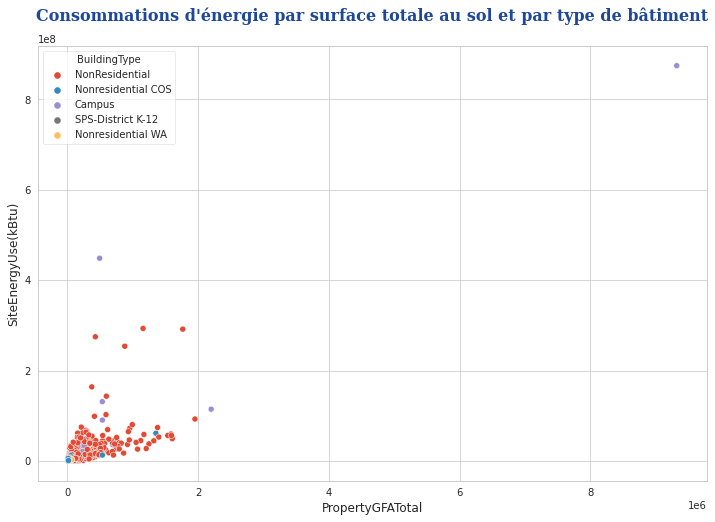

In [10]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.savefig("../images/sea/consommation-par-surface.png")
plt.show()

Un bâtiment de type campus est très supérieur aux autres données. Il ne s'agit sans doute pas d'une valeur abérrante mais d'une valeur atypique qui est très isolée, nous poursuivons l'analyse afin de décider de la supprimer ou non de nos données sources.

Nous identifions le campus en question

In [11]:
df[df['SiteEnergyUse(kBtu)']>8*10**8]

,OSEBuildingID,Neighborhood,Address,State,PrimaryPropertyType,BuildingType,PropertyName,NumberofFloors,PropertyGFATotal,DataYear,...,NaturalGas(kBtu),ZipCode,ENERGYSTARScore,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,haversine_distance
1507,49967,NORTHEAST,NE 45th St & Brooklyn Ave,WA,University,Campus,University of Washington - Seattle Campus,0,9320156,2016,...,0.0,98105.0,NaN,116,1,1.0,0.0,83965.369,0.0,3.612662


Garder cette valeur biaiserai notre dataset, nous décidons de la supprimer

In [12]:
df = df[df['SiteEnergyUse(kBtu)']<8*10**8]

Refaire le graphe sans l'outlier

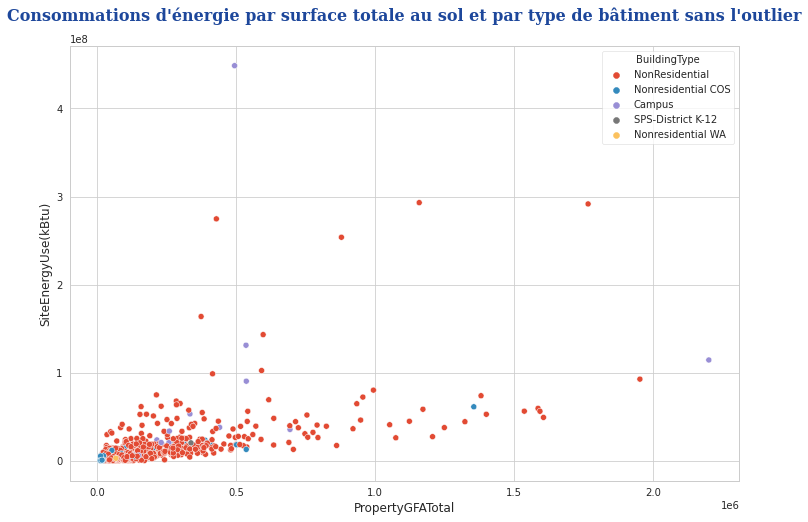

In [13]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment sans l'outlier\n", 
          fontdict=font_title, fontsize=16)
plt.savefig("../images/sea/consommation-par-surface-sans-outlier.png")
plt.show()

Nous vérifions également la distribution des rejets CO2 en fonction des surfaces totales au sol par catégorie de bâtiment.

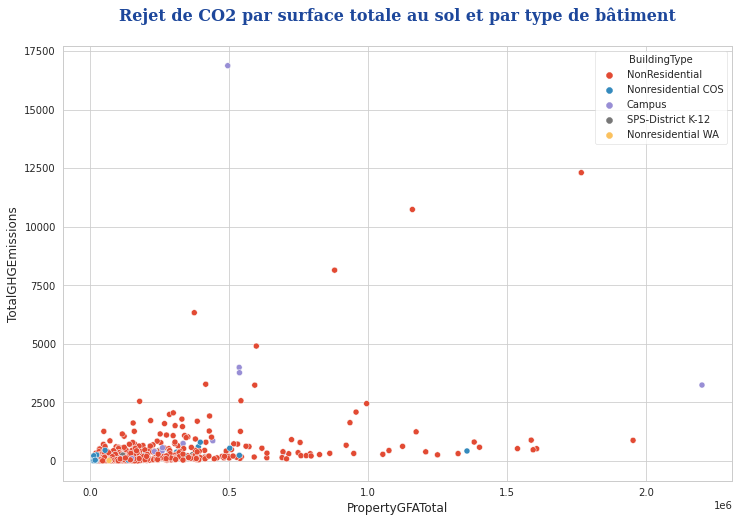

In [14]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='PropertyGFATotal', y='TotalGHGEmissions', hue='BuildingType')
plt.title(f"Rejet de CO2 par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.savefig("../images/sea/rejets-par-surface.png")
plt.show()

Nous observons également un bâtiment de type campus avec une valeur isolée des autres, nous décidons de la conserver

Nous allons regrouper les données d'identification des bâtiments afin qu'elles ne perturbent pas nos modélisations mais restent utilisables.

In [15]:
identification_features = ['OSEBuildingID', 'PropertyName', 'Address', 'ZipCode']
df_identification = df[identification_features]
df.drop(identification_features, axis=1, inplace = True)

Pour éviter le data leakage, c'est à dire prendre en compte des variables seulement observable au moment de la prédiction, nous allons exclure les variables de relevés 

In [16]:
df_filter = df.drop(['SteamUse(kBtu)','Electricity(kBtu)',
                         'NaturalGas(kBtu)'], axis=1)

Nous allons séparer les données numériques et les données catégorielles de notre dataset

In [17]:
numerical_features = df_filter.select_dtypes(include=['int64','float64'])
categorical_features = df_filter.select_dtypes(exclude=['int64','float64']) 

Pour les données catégorielles, nous allons devoir les encoder. Nous allons donc supprimer les variables qui n'apporteront rien à notre modèle (les constantes par exemple).

In [18]:
categorical_features.nunique()

Neighborhood           19
State                   1
PrimaryPropertyType    21
BuildingType            5
dtype: int64

In [19]:
categorical_features = categorical_features.drop(['State'], axis=1)

Regardons maintenant les données numériques :

In [20]:
list(numerical_features.columns)

['NumberofFloors',
 'PropertyGFATotal',
 'DataYear',
 'SiteEnergyUse(kBtu)',
 'NumberofBuildings',
 'TotalGHGEmissions',
 'ENERGYSTARScore',
 'BuildingAge',
 'TotalUseTypeNumber',
 'GFABuildingRate',
 'GFAParkingRate',
 'GFAPerBuilding',
 'GFAPerFloor',
 'haversine_distance']

La date de relevé ne nous sera pas utile ici, nous la supprimerons du jeu de données. ENERGYSTARScore est insuffisement complété. Nous allons l'écarter du dataset mais nous la conservons pour vérifier ensuite si cette variable a un impact sur la qualité de prédiction.

In [21]:
energystar_score = numerical_features['ENERGYSTARScore']
numerical_features = numerical_features.drop(['ENERGYSTARScore','DataYear'], axis=1)

Nous reconstituons le dataset qui servira à la modélisation et préparons le préprocessing des données en créant par la suite un pipeline

In [22]:
df_filter = pd.concat([categorical_features, numerical_features], axis=1)

Nous allons analyser les boxplots de variables à prédire en fonction des variables catégorielles 

Nous commençons par 'SiteEnergyUse(kBtu)' en fonction de 'BuildingType'

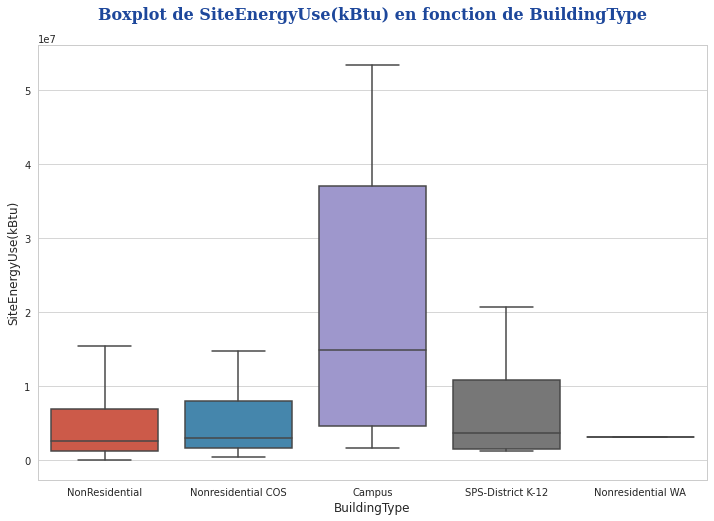

In [23]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
plt.figure(figsize=(12,8))
sns.boxplot(data=df_filter,x='BuildingType', y='SiteEnergyUse(kBtu)',showfliers = False)
plt.title(f"Boxplot de SiteEnergyUse(kBtu) en fonction de BuildingType\n", 
          fontdict=font_title, fontsize=16)
plt.savefig("../images/sea/consommation-par-type-de-batiment.png")
plt.show()


Nous constatons que les buildings de type 'NonResidential' et 'NonResidential COS' ont des box quasi-similaires, nous pourrons éventuellement les regrouper en une seule variable.

Nous analysons maintenant 'TotalGHGEmissions' en fonction de 'BuildingType'

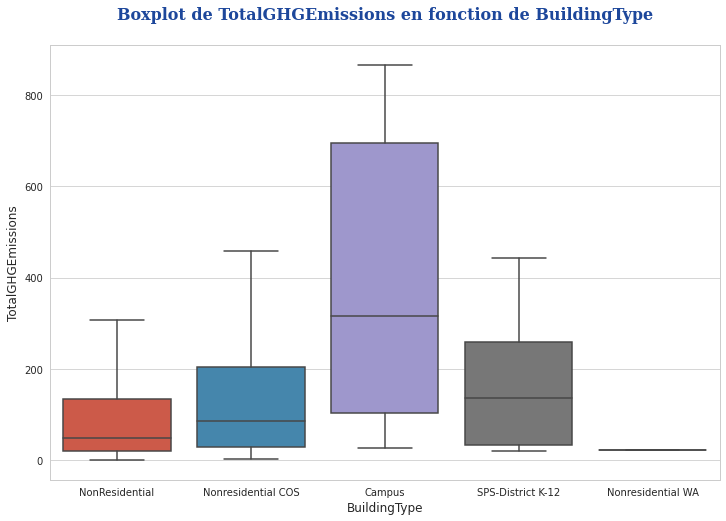

In [24]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
plt.figure(figsize=(12,8))
sns.boxplot(data=df_filter,x='BuildingType', y='TotalGHGEmissions',showfliers = False)
plt.title(f"Boxplot de TotalGHGEmissions en fonction de BuildingType\n", 
          fontdict=font_title, fontsize=16)
plt.savefig("../images/sea/rejets-par-type-de-batiment.png")
plt.show()


Nous allons proceder au regroupement des modalités similaires

In [25]:
def group_categorical(category, **mapping):
    try:
        return mapping[category]
    except:
        return category

In [26]:

df_filter['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Campus',
       'SPS-District K-12', 'Nonresidential WA'], dtype=object)

In [27]:
mapping = {'Nonresidential COS':'NonResidential'}
df_filter['NewBuildingType'] = df_filter['BuildingType'].apply(group_categorical, **mapping, axis=1)
df_filter['NewBuildingType'].unique()

array(['NonResidential', 'Campus', 'SPS-District K-12',
       'Nonresidential WA'], dtype=object)

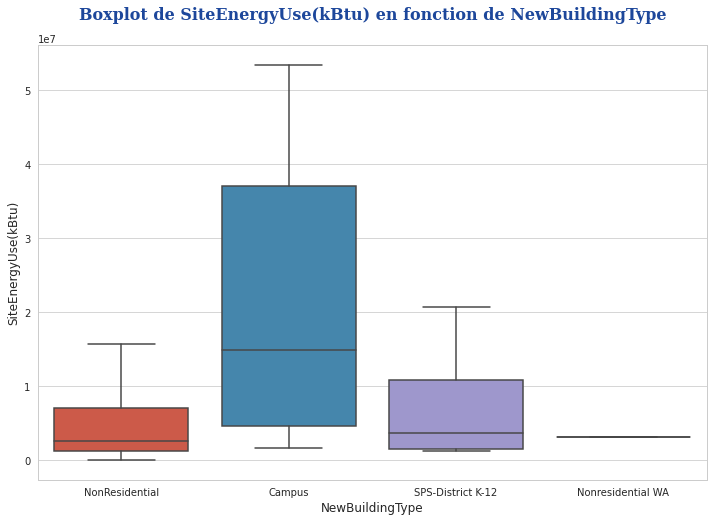

In [28]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
plt.figure(figsize=(12,8))
sns.boxplot(data=df_filter,x='NewBuildingType', y='SiteEnergyUse(kBtu)',showfliers = False)
plt.title(f"Boxplot de SiteEnergyUse(kBtu) en fonction de NewBuildingType\n", 
          fontdict=font_title, fontsize=16)
#plt.savefig("../images/sea/consommation-par-type-de-batiment.png")
plt.show()

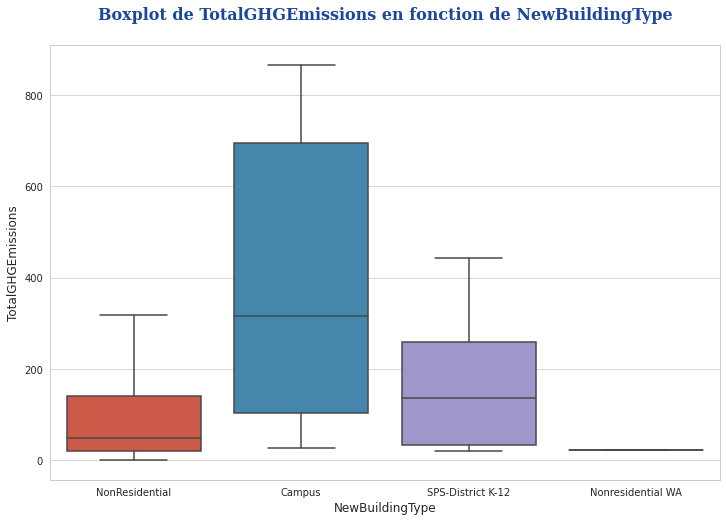

In [29]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
plt.figure(figsize=(12,8))
sns.boxplot(data=df_filter,x='NewBuildingType', y='TotalGHGEmissions',showfliers = False)
plt.title(f"Boxplot de TotalGHGEmissions en fonction de NewBuildingType\n", 
          fontdict=font_title, fontsize=16)
#plt.savefig("../images/sea/rejets-par-type-de-batiment.png")
plt.show()


Nous allons à présent analyser 'SiteEnergyUse(kBtu)' en fonction du 'Neighborhood'

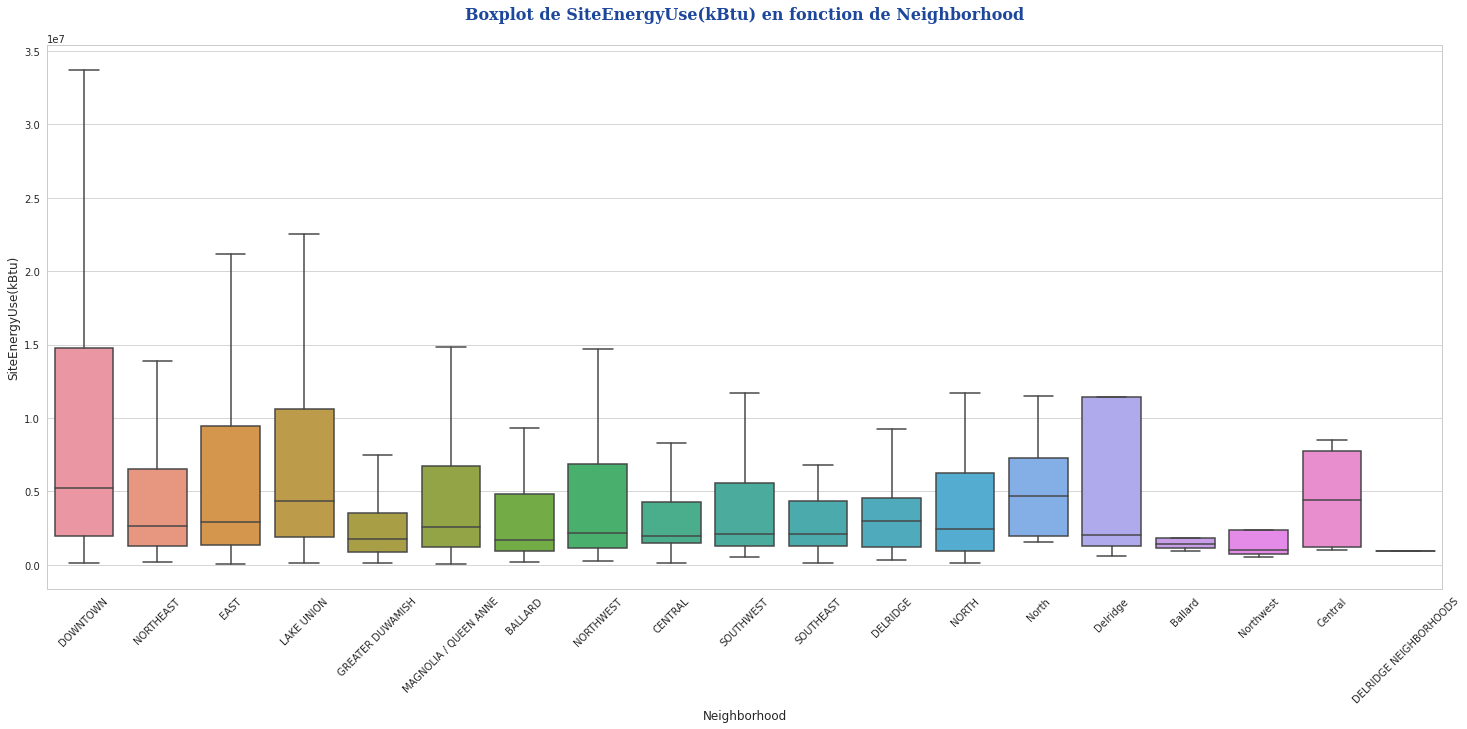

In [30]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
plt.figure(figsize=(25,10))
ax = sns.boxplot(data=df_filter,x='Neighborhood', y='SiteEnergyUse(kBtu)',showfliers = False)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title(f"Boxplot de SiteEnergyUse(kBtu) en fonction de Neighborhood\n", 
          fontdict=font_title, fontsize=16)
plt.savefig("../images/sea/consommation-par-voisinage.png")
plt.show()


Nous allons à présent analyser 'TotalGHGEmissions' en fonction du 'Neighborhood'

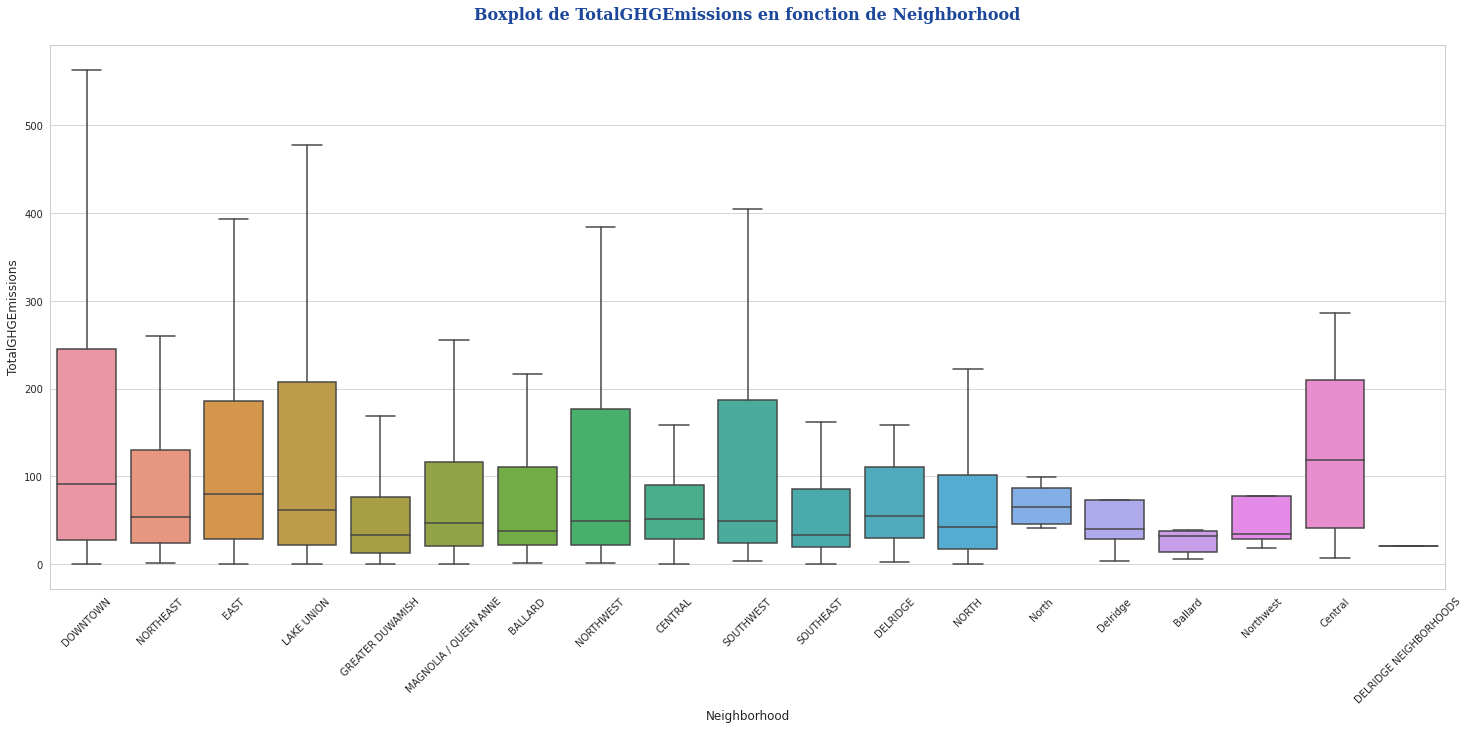

In [31]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
plt.figure(figsize=(25,10))
ax = sns.boxplot(data=df_filter,x='Neighborhood', y='TotalGHGEmissions',showfliers = False)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title(f"Boxplot de TotalGHGEmissions en fonction de Neighborhood\n", 
          fontdict=font_title, fontsize=16)
plt.savefig("../images/sea/emissions-par-voisinage.png")
plt.show()

Nous constatons que certaines modalités sont identiques, les mêmes modalités sont en minuscule et en majuscule par exemple CENTRAL et Central, DELRIDGE et Delridge etc....

Nous allons procéder au regroupement de certaines modalités

In [32]:
df_filter['Neighborhood'].unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA / QUEEN ANNE', 'BALLARD', 'NORTHWEST', 'CENTRAL',
       'SOUTHWEST', 'SOUTHEAST', 'DELRIDGE', 'NORTH', 'North', 'Delridge',
       'Ballard', 'Northwest', 'Central', 'DELRIDGE NEIGHBORHOODS'],
      dtype=object)

In [34]:
mapping = {'Central':'CENTRAL','Northwest':'NORTHWEST','North':'NORTH','Delridge':'DELRIDGE','Ballard':'BALLARD'}
df_filter['NewNeighborhood'] = df_filter['Neighborhood'].apply(group_categorical, **mapping, axis=1)
df_filter['NewNeighborhood'].unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA / QUEEN ANNE', 'BALLARD', 'NORTHWEST', 'CENTRAL',
       'SOUTHWEST', 'SOUTHEAST', 'DELRIDGE', 'NORTH',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

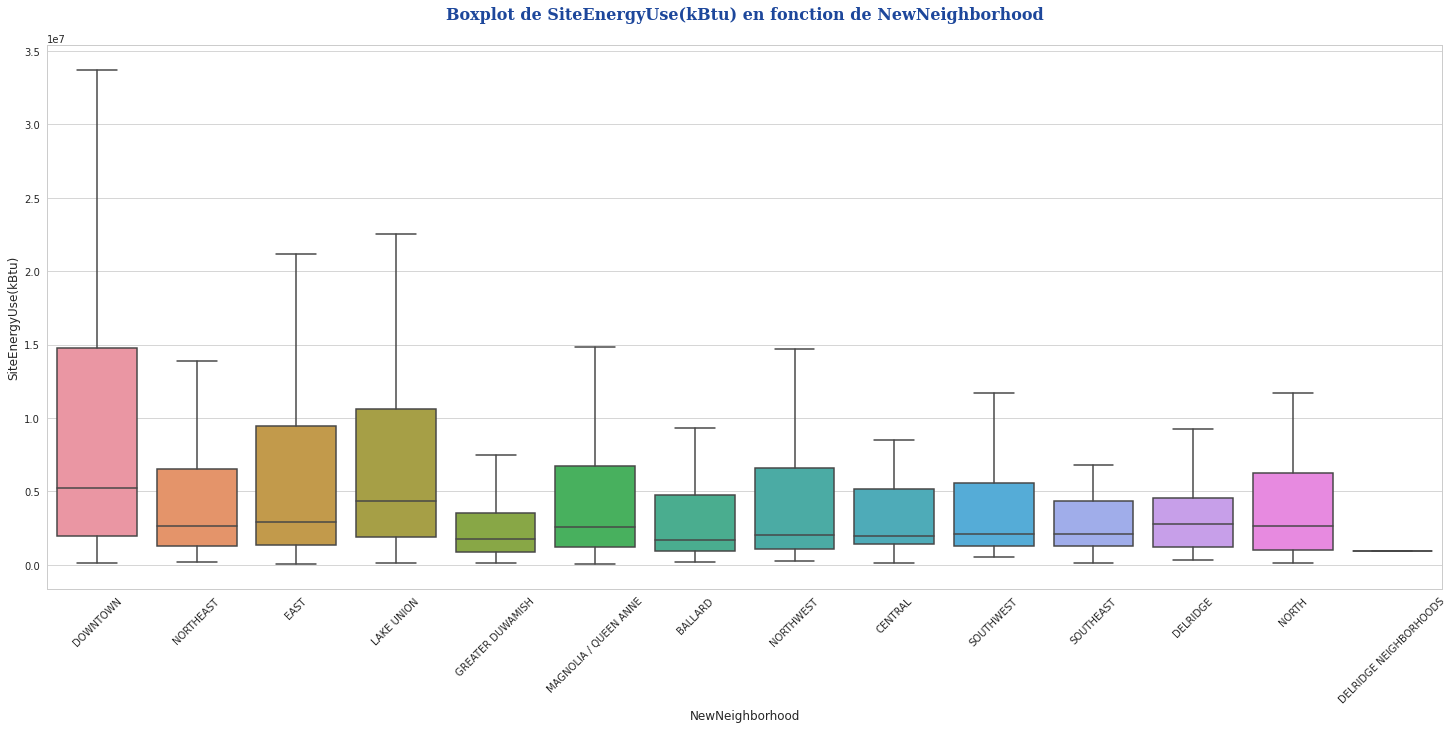

In [35]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
plt.figure(figsize=(25,10))
ax = sns.boxplot(data=df_filter,x='NewNeighborhood', y='SiteEnergyUse(kBtu)',showfliers = False)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title(f"Boxplot de SiteEnergyUse(kBtu) en fonction de NewNeighborhood\n", 
          fontdict=font_title, fontsize=16)
#plt.savefig("../images/sea/consommation-par-voisinage.png")
plt.show()

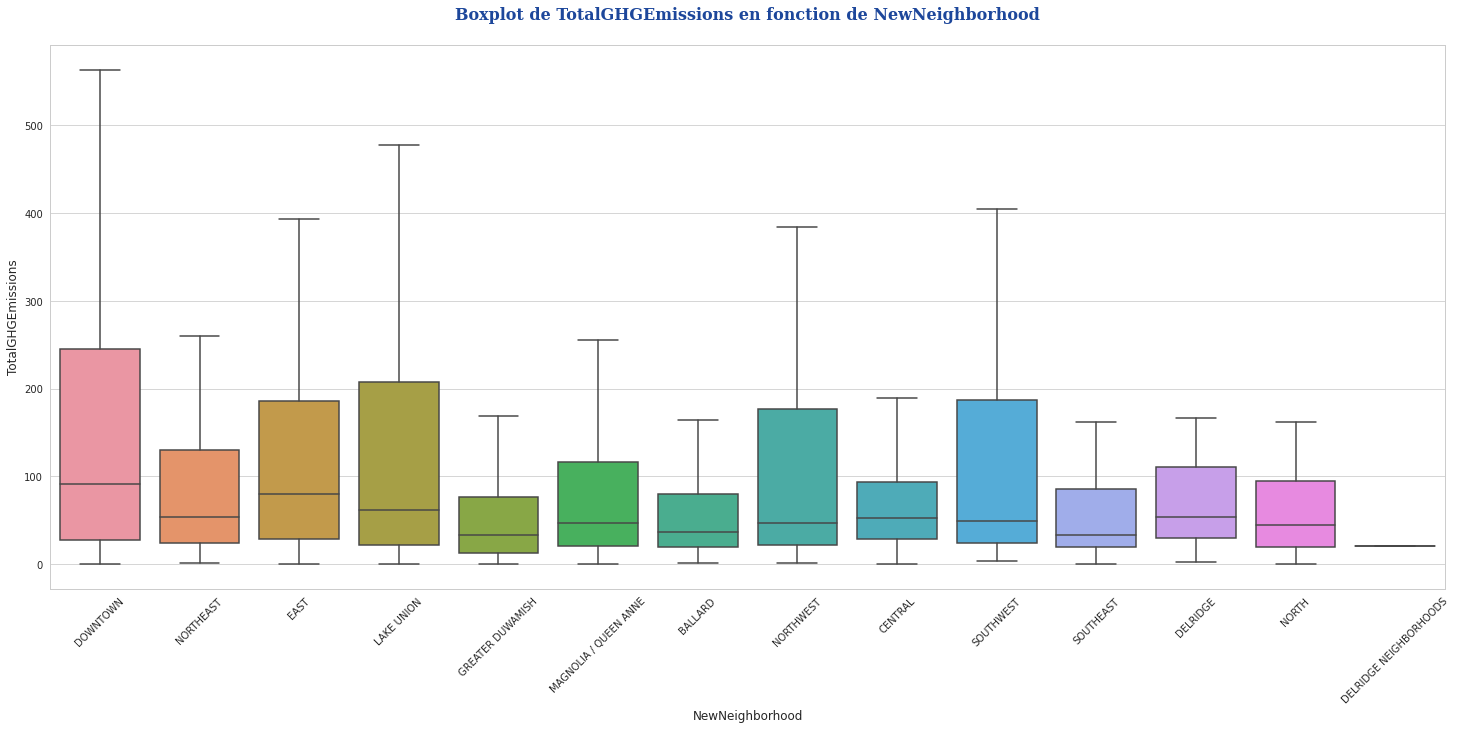

In [36]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
plt.figure(figsize=(25,10))
ax = sns.boxplot(data=df_filter,x='NewNeighborhood', y='TotalGHGEmissions',showfliers = False)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title(f"Boxplot de TotalGHGEmissions en fonction de NewNeighborhood\n", 
          fontdict=font_title, fontsize=16)
#plt.savefig("../images/sea/emissions-par-voisinage.png")
plt.show()

Nous allons maintenant analyser 'SiteEnergyUse(kBtu)' en fonction du 'PrimaryPropertyType'

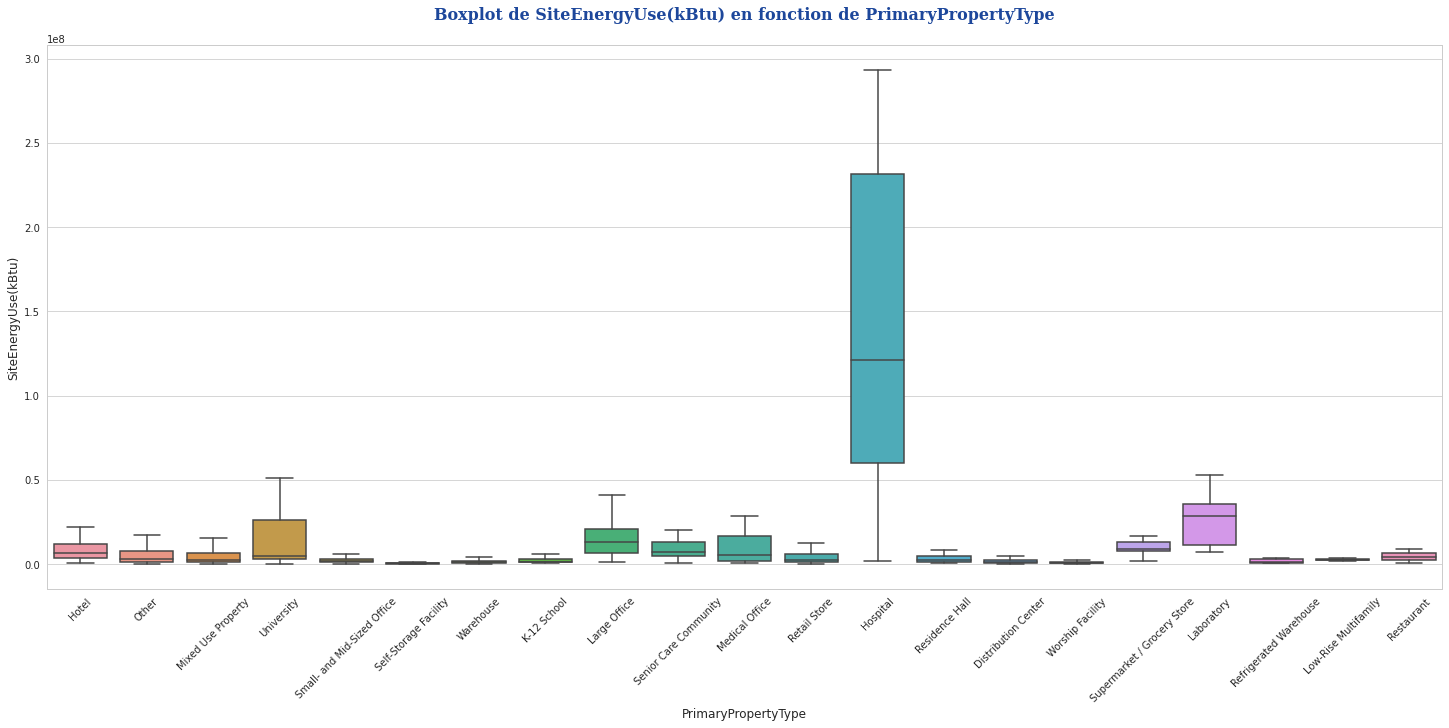

In [37]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
plt.figure(figsize=(25,10))
ax = sns.boxplot(data=df_filter,x='PrimaryPropertyType', y='SiteEnergyUse(kBtu)',showfliers = False)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title(f"Boxplot de SiteEnergyUse(kBtu) en fonction de PrimaryPropertyType\n", 
          fontdict=font_title, fontsize=16)
plt.savefig("../images/sea/consommation-par-type-de-batiment-primaire.png")
plt.show()

Nous allons maintenant analyser 'TotalGHGEmissions' en fonction du 'PrimaryPropertyType'

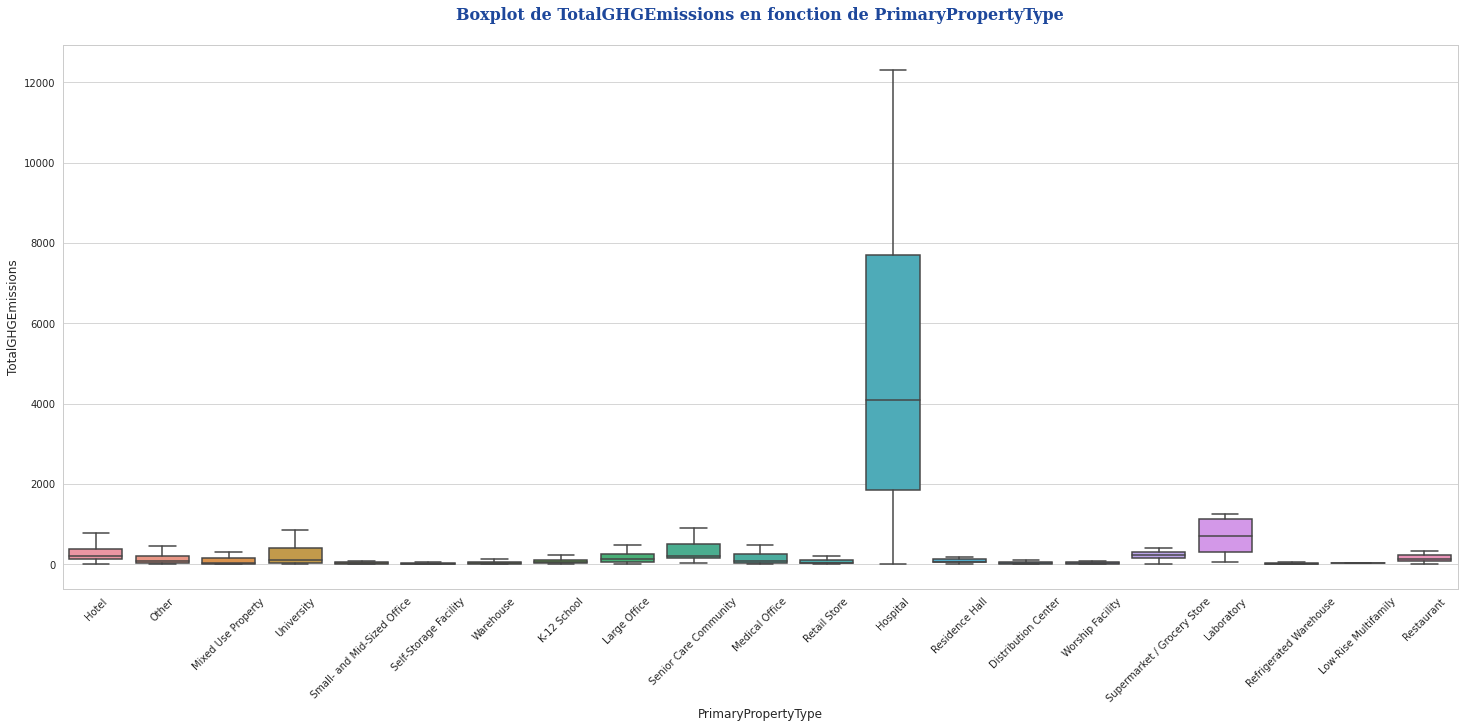

In [38]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
plt.figure(figsize=(25,10))
ax = sns.boxplot(data=df_filter,x='PrimaryPropertyType', y='TotalGHGEmissions',showfliers = False)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title(f"Boxplot de TotalGHGEmissions en fonction de PrimaryPropertyType\n", 
          fontdict=font_title, fontsize=16)
plt.savefig("../images/sea/emissions-par-type-de-batiment-primaire.png")
plt.show()

Nous constatons que certaines modalités sont similaires et peuvent être regroupées en l'occurrence 'Other' et 'Mixed Use Property', 'Small and Mid-Sized Office' et 'Distribution Center', 'Warehouse', et 'Refrigerated Warehouse'

In [39]:
df_filter['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'K-12 School', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Low-Rise Multifamily', 'Restaurant'],
      dtype=object)

In [40]:
mapping = {'Other':'Mixed Use Property','Distribution Center':'Small- and Mid-Sized Office','Refrigerated Warehouse':'Warehouse'}
df_filter['NewPrimaryPropertyType'] = df_filter['PrimaryPropertyType'].apply(group_categorical, **mapping, axis=1)
df_filter['NewPrimaryPropertyType'].unique()

array(['Hotel', 'Mixed Use Property', 'University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'K-12 School', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Worship Facility',
       'Supermarket / Grocery Store', 'Laboratory',
       'Low-Rise Multifamily', 'Restaurant'], dtype=object)

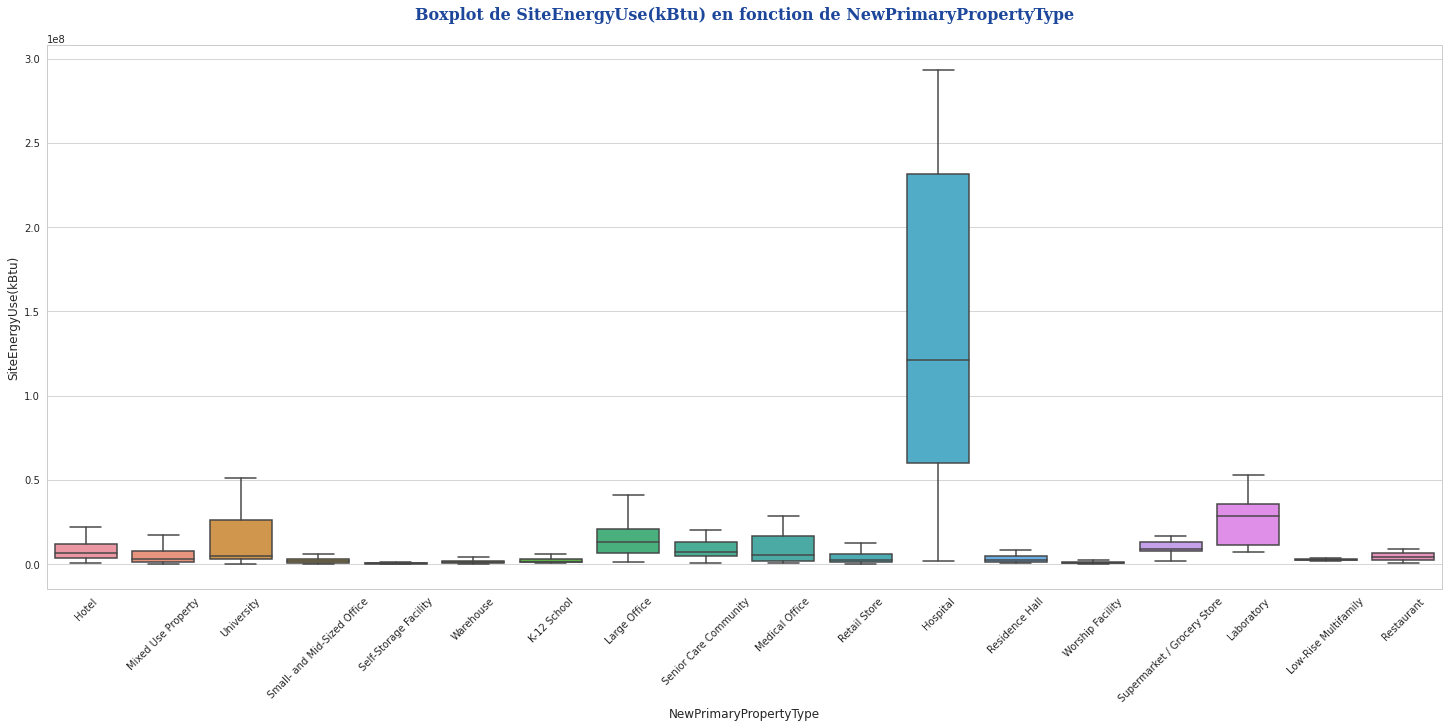

In [41]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
plt.figure(figsize=(25,10))
ax = sns.boxplot(data=df_filter,x='NewPrimaryPropertyType', y='SiteEnergyUse(kBtu)',showfliers = False)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title(f"Boxplot de SiteEnergyUse(kBtu) en fonction de NewPrimaryPropertyType\n", 
          fontdict=font_title, fontsize=16)
#plt.savefig("../images/sea/consommation-par-type-de-batiment-primaire.png")
plt.show()

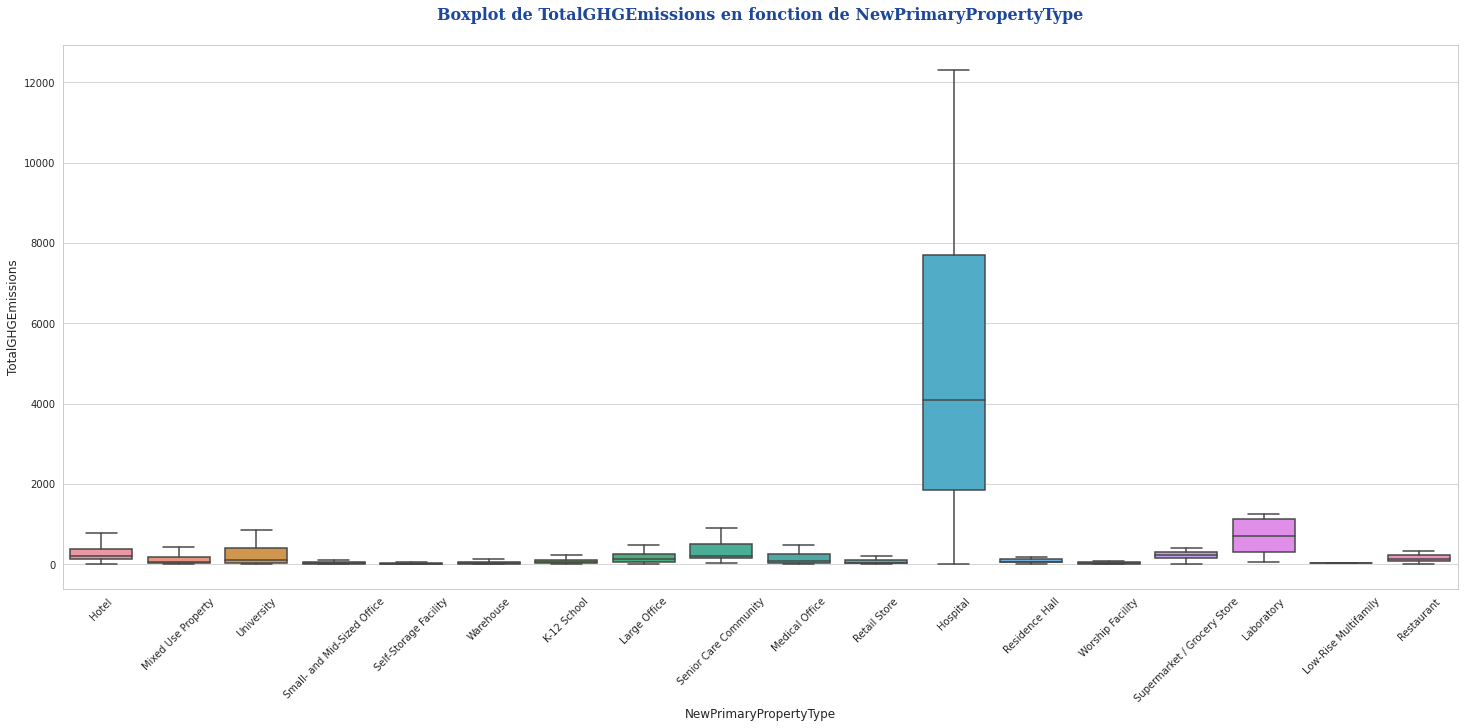

In [42]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
plt.figure(figsize=(25,10))
ax = sns.boxplot(data=df_filter,x='NewPrimaryPropertyType', y='TotalGHGEmissions',showfliers = False)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title(f"Boxplot de TotalGHGEmissions en fonction de NewPrimaryPropertyType\n", 
          fontdict=font_title, fontsize=16)
#plt.savefig("../images/sea/emissions-par-type-de-batiment-primaire.png")
plt.show()

Nous allons maintenant supprimer les 3 variables catégorielles que nous venons de modifier

In [43]:
df_final = df_filter.drop(['BuildingType','Neighborhood','PrimaryPropertyType'], axis=1)

In [44]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1544
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NumberofFloors          1544 non-null   int64  
 1   PropertyGFATotal        1544 non-null   int64  
 2   SiteEnergyUse(kBtu)     1544 non-null   float64
 3   NumberofBuildings       1544 non-null   float64
 4   TotalGHGEmissions       1544 non-null   float64
 5   BuildingAge             1544 non-null   int64  
 6   TotalUseTypeNumber      1544 non-null   int64  
 7   GFABuildingRate         1544 non-null   float64
 8   GFAParkingRate          1544 non-null   float64
 9   GFAPerBuilding          1544 non-null   float64
 10  GFAPerFloor             1544 non-null   float64
 11  haversine_distance      1544 non-null   float64
 12  NewBuildingType         1544 non-null   object 
 13  NewNeighborhood         1544 non-null   object 
 14  NewPrimaryPropertyType  1544 non-null   

Nous installons les librairies qui nous seront utiles dans la suite de notre étude

In [ ]:
''' !pip install category_encoders '''

' !pip install category_encoders '

In [ ]:
''' !pip install mlflow '''

' !pip install mlflow '

In [ ]:
''' !databricks configure --host https://community.cloud.databricks.com/ '''

' !databricks configure --host https://community.cloud.databricks.com/ '

In [ ]:
''' import mlflow
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/Users/bdiomande@dataream.fr/sea-prediction") '''

' import mlflow\nmlflow.set_tracking_uri("databricks")\nmlflow.set_experiment("/Users/bdiomande@dataream.fr/sea-prediction") '

Création d'un pipeline pour le preprocessing avec OneHotEncoder

In [46]:
# Préparation du Preprocessor
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['NewBuildingType','NewPrimaryPropertyType','NewNeighborhood']
categorical_transformer = OneHotEncoder()

numeric_features = ['haversine_distance','NumberofBuildings','NumberofFloors',
                    'PropertyGFATotal','BuildingAge','TotalUseTypeNumber',
                    'GFABuildingRate','GFAParkingRate','GFAPerBuilding','GFAPerFloor']
numeric_transformer = RobustScaler(unit_variance=True)

preprocessor = ColumnTransformer(transformers=[
    ('categorical', categorical_transformer, categorical_features),
    ('numeric', numeric_transformer, numeric_features)
])

Construction des données

In [50]:
''' from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0])) '''

' from sklearn.model_selection import train_test_split\n\n\nX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)\n\nprint("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],\n                                                            X_test.shape[0])) '

Concernant nos variables à prédire, nous allons regarder l'impact du passage à l'échelle logarithmique sur les distribution :

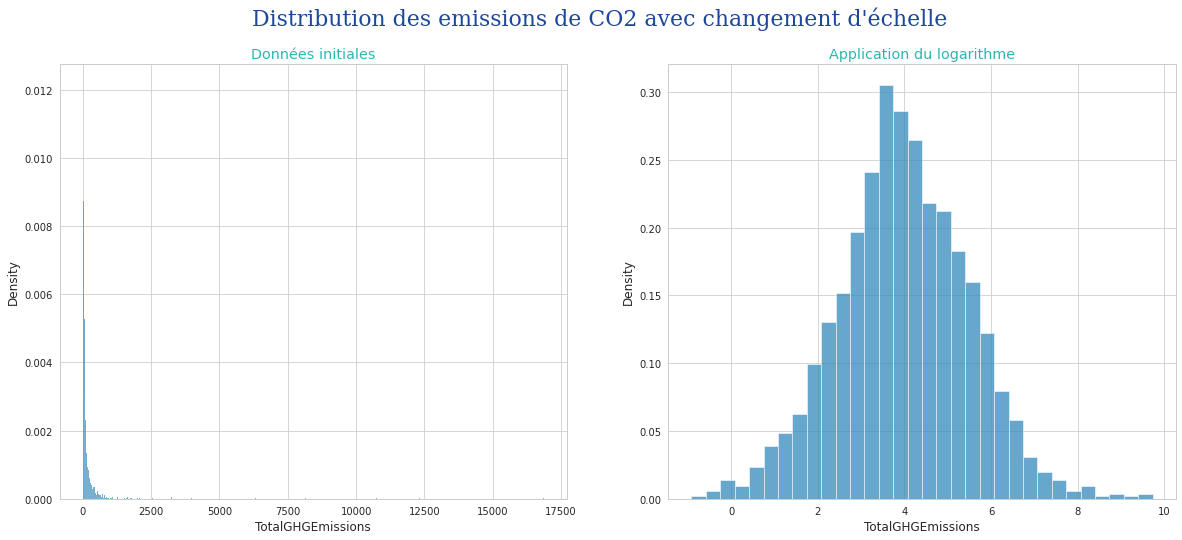

In [47]:
''' from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(Y)
 '''
X = df_final.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)'], axis=1)
Y = df_final[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]
import numpy as np
Y_log = np.log(Y)
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=Y, x='TotalGHGEmissions', stat="density", ax=axes[0])
axes[0].set_title("Données initiales", color='#2cb7b0')
sns.histplot(data=Y_log, x='TotalGHGEmissions', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0')
plt.suptitle("Distribution des emissions de CO2 avec changement d'échelle", fontdict=font_title, fontsize=22)
plt.savefig("../images/sea/distribution-emissionCO2-avec-echelle.png")
plt.show()

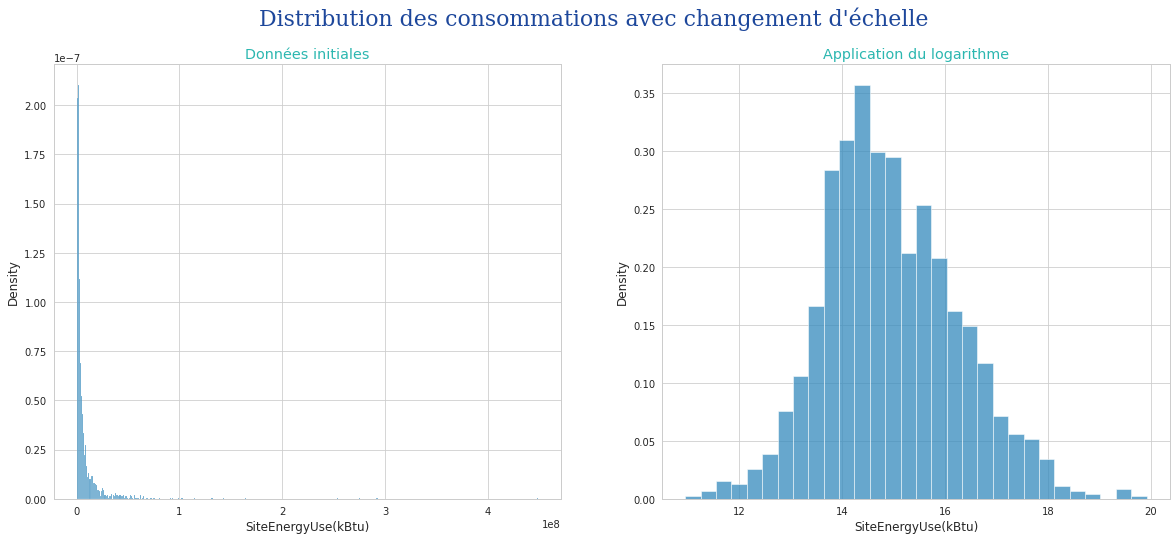

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=Y, x='SiteEnergyUse(kBtu)', stat="density", ax=axes[0])
axes[0].set_title("Données initiales", color='#2cb7b0')
sns.histplot(data=Y_log, x='SiteEnergyUse(kBtu)', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0')
plt.suptitle("Distribution des consommations avec changement d'échelle", fontdict=font_title, fontsize=22)
plt.savefig("../images/sea/distribution-consommations-avec-echelle.png")
plt.show()

### **2.&nbsp;Modèle baseline : Régression linéaire multivariée**

A présent, nous allons créer un modèle baseline pour évaluer les performances de nos futurs modèles et vérifier qu'ils améliore les prédictions. Pour cette baseline, nous utiliserons une régression linéaire multivariée.

Nous allons calculer 2 principales métriques pour évaluer nos modèles :

* MAE : Mean Absolute Error.
* R² : Coeficient de détermination, carré du coefficient de corrélation linéaire.

In [45]:
#Retour des meilleurs scores NMAE et R2
#Stockage du dataframe de resultats du modèle
def model_scores(pip,step):
    df_results = pd.DataFrame.from_dict(pip.named_steps[step].cv_results_).sort_values('rank_test_neg_mean_absolute_error')#neg_mean_absolute_error
    best_nmae = pip.named_steps[step].best_score_
    best_r2 = np.mean(df_results[df_results.rank_test_r2 == 1]['mean_test_r2'])
    best_params = pip.named_steps[step].best_params_
    training_time = round((np.mean(df_results.mean_fit_time)*X_train.shape[0]),2)
    print("Meilleur score MAE : {}\nMeilleur Score R2 : {}\nMeilleurs paramètres : {}\nTemps moyen d'entrainement : {}s"\
         .format(round(best_nmae,3), round(best_r2,3), best_params, training_time))
    return df_results

In [ ]:
''' current_run = mlflow.start_run()
mlflow.sklearn.autolog() '''

' current_run = mlflow.start_run()\nmlflow.sklearn.autolog() '

Preprocessing

In [49]:
X_transf = preprocessor.fit_transform(X)

Nous allons donc spliter nos données transformées pour obtenir un jeu d'entrainement et un jeu de test (20% des données)

In [50]:
from sklearn.model_selection import train_test_split
X_train_transf, X_test_transf, Y_train_transf, Y_test_transf = train_test_split(X_transf, Y, test_size=0.2, random_state=42)

LinearRegression

Sans la log transformation

In [51]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_mlr = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}
lr_transf = GridSearchCV(TransformedTargetRegressor(regressor=LinearRegression()),
                            param_grid=param_mlr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)

lr_transf_fit = lr_transf.fit(X_train_transf,Y_train_transf['SiteEnergyUse(kBtu)'])
Y_pred = lr_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
mae = mean_absolute_error(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

r2 = 0.4124110271266156
mae = 5529224.982960978


In [52]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_mlr = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}
lr_transf = GridSearchCV(TransformedTargetRegressor(regressor=LinearRegression()),
                            param_grid=param_mlr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)

lr_transf_fit = lr_transf.fit(X_train_transf,Y_train_transf['TotalGHGEmissions'])
Y_pred = lr_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['TotalGHGEmissions'],Y_pred)
mae = mean_absolute_error(Y_test_transf['TotalGHGEmissions'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

r2 = 0.33705903413312643
mae = 189.7210251153899


Avec log transformation

In [53]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_mlr = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}
lr_transf = GridSearchCV(TransformedTargetRegressor(regressor=LinearRegression(),func=np.log, inverse_func=np.exp),
                            param_grid=param_mlr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)

lr_transf_fit = lr_transf.fit(X_train_transf,Y_train_transf['SiteEnergyUse(kBtu)'])
Y_pred = lr_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
mae = mean_absolute_error(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

r2 = -583762.0721406409
mae = 1449238935.8189492


In [54]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_mlr = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}
lr_transf = GridSearchCV(TransformedTargetRegressor(regressor=LinearRegression(),func=np.log, inverse_func=np.exp),
                            param_grid=param_mlr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)

lr_transf_fit = lr_transf.fit(X_train_transf,Y_train_transf['TotalGHGEmissions'])
Y_pred = lr_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['TotalGHGEmissions'],Y_pred)
mae = mean_absolute_error(Y_test_transf['TotalGHGEmissions'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

r2 = -1773862.154249704
mae = 93397.11497504792


ElasticNet

Sans log transformation

In [55]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}
en_transf = GridSearchCV(TransformedTargetRegressor(regressor=ElasticNet()),
                            param_grid=param_eNet,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)
en_transf_fit = en_transf.fit(X_train_transf,Y_train_transf['SiteEnergyUse(kBtu)'])
Y_pred = en_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
mae = mean_absolute_error(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

r2 = 0.41427058211269885
mae = 5493407.831579091


In [55]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}
en_transf = GridSearchCV(TransformedTargetRegressor(regressor=ElasticNet()),
                            param_grid=param_eNet,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)
en_transf_fit = en_transf.fit(X_train_transf,Y_train_transf['TotalGHGEmissions'])
Y_pred = en_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['TotalGHGEmissions'],Y_pred)
mae = mean_absolute_error(Y_test_transf['TotalGHGEmissions'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

r2 = 0.32892765045116357
mae = 183.528418848415


Avec log transformation

In [56]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}
en_transf = GridSearchCV(TransformedTargetRegressor(regressor=ElasticNet(),func=np.log, inverse_func=np.exp),
                            param_grid=param_eNet,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)
en_transf_fit = en_transf.fit(X_train_transf,Y_train_transf['SiteEnergyUse(kBtu)'])
Y_pred = en_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
mae = mean_absolute_error(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

r2 = -2.4465742937596864
mae = 10209309.285295403


In [58]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}
en_transf = GridSearchCV(TransformedTargetRegressor(regressor=ElasticNet(),func=np.log, inverse_func=np.exp),
                            param_grid=param_eNet,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)
en_transf_fit = en_transf.fit(X_train_transf,Y_train_transf['TotalGHGEmissions'])
Y_pred = en_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['TotalGHGEmissions'],Y_pred)
mae = mean_absolute_error(Y_test_transf['TotalGHGEmissions'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

r2 = 0.08496741277609587
mae = 210.13089206077723


In [67]:
''' X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) '''

' X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) '

In [68]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline

param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}

eNet_grid_cv = Pipeline([
    ('grid_search_enet', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=ElasticNet()),
                            param_grid=param_eNet,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [69]:
GHG_eNet_model = eNet_grid_cv.fit(X_train_transf, Y_train_transf['TotalGHGEmissions'])
GHG_eNet_results = model_scores(GHG_eNet_model, 'grid_search_enet')

Meilleur score MAE : -142.424
Meilleur Score R2 : 0.173
Meilleurs paramètres : {'regressor__alpha': 1.0, 'regressor__l1_ratio': 1.0, 'regressor__max_iter': 100}
Temps moyen d'entrainement : 74.44s


In [70]:
Y_pred = GHG_eNet_model.predict(X_test_transf)
r2 = r2_score(Y_test_transf['TotalGHGEmissions'],Y_pred)
mae = mean_absolute_error(Y_test_transf['TotalGHGEmissions'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

r2 = 0.32892765045116357
mae = 183.528418848415


RandomForest

Sans log transformation

In [59]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5]}
rfr_transf = GridSearchCV(TransformedTargetRegressor(regressor=RandomForestRegressor()),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)
rfr_transf_fit = rfr_transf.fit(X_train_transf,Y_train_transf['SiteEnergyUse(kBtu)'])
Y_pred = rfr_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
mae = mean_absolute_error(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

r2 = 0.4640551366827562
mae = 5129468.301627244


In [60]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5]}
rfr_transf = GridSearchCV(TransformedTargetRegressor(regressor=RandomForestRegressor()),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)
rfr_transf_fit = rfr_transf.fit(X_train_transf,Y_train_transf['TotalGHGEmissions'])
Y_pred = rfr_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['TotalGHGEmissions'],Y_pred)
mae = mean_absolute_error(Y_test_transf['TotalGHGEmissions'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

r2 = 0.40395148398783853
mae = 162.844717476896


Avec log transformation

In [61]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5]}
rfr_transf = GridSearchCV(TransformedTargetRegressor(regressor=RandomForestRegressor(),func=np.log, inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)
rfr_transf_fit = rfr_transf.fit(X_train_transf,Y_train_transf['SiteEnergyUse(kBtu)'])
Y_pred = rfr_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
mae = mean_absolute_error(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

r2 = 0.3478238638003668
mae = 5304886.068662056


In [62]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5]}
rfr_transf = GridSearchCV(TransformedTargetRegressor(regressor=RandomForestRegressor(),func=np.log, inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)
rfr_transf_fit = rfr_transf.fit(X_train_transf,Y_train_transf['TotalGHGEmissions'])
Y_pred = rfr_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['TotalGHGEmissions'],Y_pred)
mae = mean_absolute_error(Y_test_transf['TotalGHGEmissions'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

r2 = 0.2516815481817932
mae = 172.15656079850862


In [ ]:
''' from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor()

rf.fit(X_train_transf_log,Y_train_transf_log['TotalGHGEmissions'])
Y_pred_log = rf.predict(X_test_transf_log)
Y_pred = np.exp(Y_pred_log)
r2 = r2_score(np.exp(Y_test_transf_log['TotalGHGEmissions']),Y_pred)
r2_bis = r2_score(Y_test_transf_log['TotalGHGEmissions'],Y_pred_log)
mae = mean_absolute_error(np.exp(Y_test_transf_log['TotalGHGEmissions']),Y_pred)
mae_bis = mean_absolute_error(Y_test_transf_log['TotalGHGEmissions'],Y_pred_log)
print(f'r2 = {r2}')
print(f'r2_bis = {r2_bis}')
print(f'mae = {mae}')
print(f'mae_bis = {mae_bis}') '''

" from sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import mean_absolute_error\nfrom sklearn.metrics import r2_score\nrf = RandomForestRegressor()\n\nrf.fit(X_train_transf_log,Y_train_transf_log['TotalGHGEmissions'])\nY_pred_log = rf.predict(X_test_transf_log)\nY_pred = np.exp(Y_pred_log)\nr2 = r2_score(np.exp(Y_test_transf_log['TotalGHGEmissions']),Y_pred)\nr2_bis = r2_score(Y_test_transf_log['TotalGHGEmissions'],Y_pred_log)\nmae = mean_absolute_error(np.exp(Y_test_transf_log['TotalGHGEmissions']),Y_pred)\nmae_bis = mean_absolute_error(Y_test_transf_log['TotalGHGEmissions'],Y_pred_log)\nprint(f'r2 = {r2}')\nprint(f'r2_bis = {r2_bis}')\nprint(f'mae = {mae}')\nprint(f'mae_bis = {mae_bis}') "

XGBoost

Sans log transformation

In [63]:
from sklearn.compose import TransformedTargetRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_xgb = {'regressor__learning_rate' : [0.001, 0.01, 0.1, 0.2, 0,3],
             'regressor__gamma': [0, 0.25, 0.5, 1.0],
             'regressor__max_depth': [6, 10, 15, 20],
             'regressor__min_child_weight' : [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
             'regressor__n_estimators': [25, 50, 100, 500, 1000]}

xgb_transf = RandomizedSearchCV(TransformedTargetRegressor(regressor=xgb.XGBRegressor()),
                            param_distributions=param_xgb,
                            n_iter=20,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)
xgb_transf_fit = xgb_transf.fit(X_train_transf,Y_train_transf['SiteEnergyUse(kBtu)'])
Y_pred = xgb_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
mae = mean_absolute_error(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

[00:14:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 = 0.29468432684872703
mae = 6269613.200719741


In [64]:
from sklearn.compose import TransformedTargetRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_xgb = {'regressor__learning_rate' : [0.001, 0.01, 0.1, 0.2, 0,3],
             'regressor__gamma': [0, 0.25, 0.5, 1.0],
             'regressor__max_depth': [6, 10, 15, 20],
             'regressor__min_child_weight' : [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
             'regressor__n_estimators': [25, 50, 100, 500, 1000]}

xgb_transf = RandomizedSearchCV(TransformedTargetRegressor(regressor=xgb.XGBRegressor()),
                            param_distributions=param_xgb,
                            n_iter=20,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)
xgb_transf_fit = xgb_transf.fit(X_train_transf,Y_train_transf['TotalGHGEmissions'])
Y_pred = xgb_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['TotalGHGEmissions'],Y_pred)
mae = mean_absolute_error(Y_test_transf['TotalGHGEmissions'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

[00:15:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 = 0.18280782461205525
mae = 181.93124011561324


Avec log transformation

In [65]:
from sklearn.compose import TransformedTargetRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_xgb = {'regressor__learning_rate' : [0.001, 0.01, 0.1, 0.2, 0,3],
             'regressor__gamma': [0, 0.25, 0.5, 1.0],
             'regressor__max_depth': [6, 10, 15, 20],
             'regressor__min_child_weight' : [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
             'regressor__n_estimators': [25, 50, 100, 500, 1000]}

xgb_transf = RandomizedSearchCV(TransformedTargetRegressor(regressor=xgb.XGBRegressor(),func=np.log, inverse_func=np.exp),
                            param_distributions=param_xgb,
                            n_iter=20,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)
xgb_transf_fit = xgb_transf.fit(X_train_transf,Y_train_transf['SiteEnergyUse(kBtu)'])
Y_pred = xgb_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
mae = mean_absolute_error(Y_test_transf['SiteEnergyUse(kBtu)'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

[00:21:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 = 0.4023256157278038
mae = 4620178.717710032


In [66]:
from sklearn.compose import TransformedTargetRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
param_xgb = {'regressor__learning_rate' : [0.001, 0.01, 0.1, 0.2, 0,3],
             'regressor__gamma': [0, 0.25, 0.5, 1.0],
             'regressor__max_depth': [6, 10, 15, 20],
             'regressor__min_child_weight' : [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
             'regressor__n_estimators': [25, 50, 100, 500, 1000]}

xgb_transf = RandomizedSearchCV(TransformedTargetRegressor(regressor=xgb.XGBRegressor(),func=np.log, inverse_func=np.exp),
                            param_distributions=param_xgb,
                            n_iter=20,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)
xgb_transf_fit = xgb_transf.fit(X_train_transf,Y_train_transf['TotalGHGEmissions'])
Y_pred = xgb_transf.predict(X_test_transf)
r2 = r2_score(Y_test_transf['TotalGHGEmissions'],Y_pred)
mae = mean_absolute_error(Y_test_transf['TotalGHGEmissions'],Y_pred)
print(f'r2 = {r2}')
print(f'mae = {mae}')

[00:22:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 = 0.2608933238684551
mae = 162.31214443333326


In [ ]:
''' import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
xgbr = xgb.XGBRegressor()

xgbr.fit(X_train_transf_log,Y_train_transf_log['TotalGHGEmissions'])
Y_pred_log = xgbr.predict(X_test_transf_log)
r2 = r2_score(Y_test_transf_log['TotalGHGEmissions'],Y_pred_log)
mae = mean_absolute_error(Y_test_transf_log['TotalGHGEmissions'],Y_pred_log)
print(f'r2 = {r2}')
print(f'mae = {mae}') '''

[08:54:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 = 0.5143734494559065
mae = 0.8544218558497619


In [ ]:
''' metrics = mlflow.sklearn.eval_and_log_metrics(lr, X_test_transf, Y_test_transf['TotalGHGEmissions'], prefix="val_")
mlflow.end_run() '''

' metrics = mlflow.sklearn.eval_and_log_metrics(lr, X_test_transf, Y_test_transf[\'TotalGHGEmissions\'], prefix="val_")\nmlflow.end_run() '

Nous commençons dans un premier temps avec le preprocesseur TargetEncoder

In [ ]:
''' from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


param_mlr1 = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}

mlr_grid_cv1 = Pipeline([
    ('preprocessor1', preprocessor1),
    ('grid_search_mlr1', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearRegression(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_mlr1,
                            cv=3,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))]) '''

' from sklearn.compose import TransformedTargetRegressor\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn import set_config\nset_config(display=\'diagram\')\n\n\nparam_mlr1 = {"regressor__fit_intercept": [True, False],\n             "regressor__normalize": [True, False]}\n\nmlr_grid_cv1 = Pipeline([\n    (\'preprocessor1\', preprocessor1),\n    (\'grid_search_mlr1\', GridSearchCV(\n                            TransformedTargetRegressor(\n                                regressor=LinearRegression(), \n                                func=np.log, \n                                inverse_func=np.exp),\n                            param_grid=param_mlr1,\n                            cv=3,\n                            scoring=(\'r2\',\'neg_mean_absolute_error\'),\n                            return_train_score = True,\n                            refit=\'neg_mean_absolute_error\',\n     

In [ ]:
''' GHG_mlr_model1 = mlr_grid_cv1.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_mlr_results1 = model_scores(GHG_mlr_model1, 'grid_search_mlr1') '''

" GHG_mlr_model1 = mlr_grid_cv1.fit(X_train, Y_train['TotalGHGEmissions'])\nGHG_mlr_results1 = model_scores(GHG_mlr_model1, 'grid_search_mlr1') "

In [ ]:
''' SEU_mlr_model1 = mlr_grid_cv1.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_mlr_results1 = model_scores(SEU_mlr_model1, 'grid_search_mlr1') '''

" SEU_mlr_model1 = mlr_grid_cv1.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])\nSEU_mlr_results1 = model_scores(SEU_mlr_model1, 'grid_search_mlr1') "

Nous testons sans log trasnformation sur Y

In [ ]:
''' from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


param_mlr1 = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}

mlr_grid_cv1 = Pipeline([
    ('preprocessor1', preprocessor1),
    ('grid_search_mlr1', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearRegression()),
                            param_grid=param_mlr1,
                            cv=3,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))]) '''

' from sklearn.linear_model import LinearRegression\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn import set_config\nset_config(display=\'diagram\')\n\n\nparam_mlr1 = {"regressor__fit_intercept": [True, False],\n             "regressor__normalize": [True, False]}\n\nmlr_grid_cv1 = Pipeline([\n    (\'preprocessor1\', preprocessor1),\n    (\'grid_search_mlr1\', GridSearchCV(\n                            TransformedTargetRegressor(\n                                regressor=LinearRegression()),\n                            param_grid=param_mlr1,\n                            cv=3,\n                            scoring=(\'r2\',\'neg_mean_absolute_error\'),\n                            return_train_score = True,\n                            refit=\'neg_mean_absolute_error\',\n                            n_jobs = -1))]) '

In [ ]:
''' GHG_mlr_model1 = mlr_grid_cv1.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_mlr_results1 = model_scores(GHG_mlr_model1, 'grid_search_mlr1') '''

" GHG_mlr_model1 = mlr_grid_cv1.fit(X_train, Y_train['TotalGHGEmissions'])\nGHG_mlr_results1 = model_scores(GHG_mlr_model1, 'grid_search_mlr1') "

In [ ]:
''' SEU_mlr_model1 = mlr_grid_cv1.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_mlr_results1 = model_scores(SEU_mlr_model1, 'grid_search_mlr1')
 '''

" SEU_mlr_model1 = mlr_grid_cv1.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])\nSEU_mlr_results1 = model_scores(SEU_mlr_model1, 'grid_search_mlr1')\n "

Nous allons maintenant tester avec un StandardScaler en lieu et place du RobustScaler

In [ ]:
''' # Préparation du Preprocessor
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, RobustScaler
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer

target_features = ['BuildingType','PrimaryPropertyType','Neighborhood']
target_transformer = TargetEncoder()

numeric11_features = ['haversine_distance','NumberofBuildings','NumberofFloors',
                    'PropertyGFATotal','BuildingAge','TotalUseTypeNumber',
                    'GFABuildingRate','GFAParkingRate','GFAPerBuilding','GFAPerFloor']
numeric11_transformer = StandardScaler()

preprocessor11 = ColumnTransformer(transformers=[
    ('target', target_transformer, target_features),
    ('numeric11', numeric11_transformer, numeric11_features)
]) '''

" # Préparation du Preprocessor\nfrom sklearn.preprocessing import StandardScaler, OrdinalEncoder, RobustScaler\nfrom category_encoders.target_encoder import TargetEncoder\nfrom sklearn.compose import ColumnTransformer\n\ntarget_features = ['BuildingType','PrimaryPropertyType','Neighborhood']\ntarget_transformer = TargetEncoder()\n\nnumeric11_features = ['haversine_distance','NumberofBuildings','NumberofFloors',\n                    'PropertyGFATotal','BuildingAge','TotalUseTypeNumber',\n                    'GFABuildingRate','GFAParkingRate','GFAPerBuilding','GFAPerFloor']\nnumeric11_transformer = StandardScaler()\n\npreprocessor11 = ColumnTransformer(transformers=[\n    ('target', target_transformer, target_features),\n    ('numeric11', numeric11_transformer, numeric11_features)\n]) "

In [ ]:
''' from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


param_mlr1 = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}

mlr_grid_cv1 = Pipeline([
    ('preprocessor11', preprocessor11),
    ('grid_search_mlr1', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearRegression()),
                            param_grid=param_mlr1,
                            cv=3,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))]) '''

' from sklearn.linear_model import LinearRegression\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn import set_config\nset_config(display=\'diagram\')\n\n\nparam_mlr1 = {"regressor__fit_intercept": [True, False],\n             "regressor__normalize": [True, False]}\n\nmlr_grid_cv1 = Pipeline([\n    (\'preprocessor11\', preprocessor11),\n    (\'grid_search_mlr1\', GridSearchCV(\n                            TransformedTargetRegressor(\n                                regressor=LinearRegression()),\n                            param_grid=param_mlr1,\n                            cv=3,\n                            scoring=(\'r2\',\'neg_mean_absolute_error\'),\n                            return_train_score = True,\n                            refit=\'neg_mean_absolute_error\',\n                            n_jobs = -1))]) '

In [ ]:
''' GHG_mlr_model1 = mlr_grid_cv1.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_mlr_results1 = model_scores(GHG_mlr_model1, 'grid_search_mlr1') '''

" GHG_mlr_model1 = mlr_grid_cv1.fit(X_train, Y_train['TotalGHGEmissions'])\nGHG_mlr_results1 = model_scores(GHG_mlr_model1, 'grid_search_mlr1') "

In [ ]:
''' SEU_mlr_model1 = mlr_grid_cv1.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_mlr_results1 = model_scores(SEU_mlr_model1, 'grid_search_mlr1') '''

" SEU_mlr_model1 = mlr_grid_cv1.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])\nSEU_mlr_results1 = model_scores(SEU_mlr_model1, 'grid_search_mlr1') "

Dans un second temps nous allons commencer avec le processor OneHotEncoder

In [ ]:
''' from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


param_mlr2 = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}

mlr_grid_cv2 = Pipeline([
    ('preprocessor2', preprocessor2),
    ('grid_search_mlr2', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearRegression(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_mlr2,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))]) '''

' from sklearn.compose import TransformedTargetRegressor\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn import set_config\nset_config(display=\'diagram\')\n\n\nparam_mlr2 = {"regressor__fit_intercept": [True, False],\n             "regressor__normalize": [True, False]}\n\nmlr_grid_cv2 = Pipeline([\n    (\'preprocessor2\', preprocessor2),\n    (\'grid_search_mlr2\', GridSearchCV(\n                            TransformedTargetRegressor(\n                                regressor=LinearRegression(), \n                                func=np.log, \n                                inverse_func=np.exp),\n                            param_grid=param_mlr2,\n                            cv=5,\n                            scoring=(\'r2\',\'neg_mean_absolute_error\'),\n                            return_train_score = True,\n                            refit=\'neg_mean_absolute_error\',\n     

On affiche les scores de la GridSearch avec validation croisée pour la variable TotalGHGEmissions 

In [ ]:
''' #Entrainement sur les 2 variables à expliquer :
GHG_mlr_model2 = mlr_grid_cv2.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_mlr_results2 = model_scores(GHG_mlr_model2, 'grid_search_mlr2') '''

" #Entrainement sur les 2 variables à expliquer :\nGHG_mlr_model2 = mlr_grid_cv2.fit(X_train, Y_train['TotalGHGEmissions'])\nGHG_mlr_results2 = model_scores(GHG_mlr_model2, 'grid_search_mlr2') "

et les scores pour la variable SiteEnergyUse(kBtu) :

In [ ]:
''' SEU_mlr_model2 = mlr_grid_cv2.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_mlr_results2 = model_scores(SEU_mlr_model2, 'grid_search_mlr2') '''

" SEU_mlr_model2 = mlr_grid_cv2.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])\nSEU_mlr_results2 = model_scores(SEU_mlr_model2, 'grid_search_mlr2') "

Nous allons maintenant tester sans la log transformation

In [ ]:
''' from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


param_mlr2 = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}

mlr_grid_cv2 = Pipeline([
    ('preprocessor2', preprocessor2),
    ('grid_search_mlr2', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearRegression()),
                            param_grid=param_mlr2,
                            cv=3,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))]) '''

' from sklearn.linear_model import LinearRegression\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn import set_config\nset_config(display=\'diagram\')\n\n\nparam_mlr2 = {"regressor__fit_intercept": [True, False],\n             "regressor__normalize": [True, False]}\n\nmlr_grid_cv2 = Pipeline([\n    (\'preprocessor2\', preprocessor2),\n    (\'grid_search_mlr2\', GridSearchCV(\n                            TransformedTargetRegressor(\n                                regressor=LinearRegression()),\n                            param_grid=param_mlr2,\n                            cv=3,\n                            scoring=(\'r2\',\'neg_mean_absolute_error\'),\n                            return_train_score = True,\n                            refit=\'neg_mean_absolute_error\',\n                            n_jobs = -1))]) '

In [ ]:
''' GHG_mlr_model2 = mlr_grid_cv2.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_mlr_results2 = model_scores(GHG_mlr_model2, 'grid_search_mlr2') '''

" GHG_mlr_model2 = mlr_grid_cv2.fit(X_train, Y_train['TotalGHGEmissions'])\nGHG_mlr_results2 = model_scores(GHG_mlr_model2, 'grid_search_mlr2') "

In [ ]:
''' SEU_mlr_model2 = mlr_grid_cv2.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_mlr_results2 = model_scores(SEU_mlr_model2, 'grid_search_mlr2') '''

" SEU_mlr_model2 = mlr_grid_cv2.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])\nSEU_mlr_results2 = model_scores(SEU_mlr_model2, 'grid_search_mlr2') "

In [ ]:
import statsmodels.api as sm
X_train_dum = pd.get_dummies(X_train, columns=['BuildingType','PrimaryPropertyType','Neighborhood'], prefix=['BuildingType','PrimaryPropertyType','Neighborhood'])
Xc = sm.add_constant(X_train_dum)
lr = sm.OLS(Y_train['SiteEnergyUse(kBtu)'],Xc)
lr_fitted = lr.fit()
print(lr_fitted.summary())

                             OLS Regression Results                            
Dep. Variable:     SiteEnergyUse(kBtu)   R-squared:                       0.637
Model:                             OLS   Adj. R-squared:                  0.622
Method:                  Least Squares   F-statistic:                     41.54
Date:                 Tue, 25 Oct 2022   Prob (F-statistic):          5.99e-223
Time:                         22:34:45   Log-Likelihood:                -21806.
No. Observations:                 1235   AIC:                         4.371e+04
Df Residuals:                     1184   BIC:                         4.397e+04
Df Model:                           50                                         
Covariance Type:             nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [ ]:
X_train_dum = pd.get_dummies(X_train, columns=['BuildingType','PrimaryPropertyType','Neighborhood'], prefix=['BuildingType','PrimaryPropertyType','Neighborhood'])
Xc = sm.add_constant(X_train_dum)
lr = sm.OLS(Y_train['TotalGHGEmissions'],Xc)
lr_fitted = lr.fit()
print(lr_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     41.19
Date:                Tue, 25 Oct 2022   Prob (F-statistic):          1.35e-221
Time:                        22:35:36   Log-Likelihood:                -8885.7
No. Observations:                1235   AIC:                         1.787e+04
Df Residuals:                    1184   BIC:                         1.813e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Tous les résultats des GridSearchCV sont stockés dans un DataFrame pour chaque variable à prédire :

In [ ]:
''' GHG_mlr_results '''

' GHG_mlr_results '

### **3.&nbsp;Modèle linéaires : ElasticNet**

Nous allons tester avec TargetEncoder

In [ ]:
from sklearn.linear_model import ElasticNet

param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}

eNet_grid_cv = Pipeline([
    ('preprocessor1', preprocessor1),
    ('grid_search_enet', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=ElasticNet(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_eNet,
                            cv=3,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

NameError: ignored

In [ ]:
GHG_eNet_model = eNet_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_eNet_results = model_scores(GHG_eNet_model, 'grid_search_enet')

NameError: ignored

In [ ]:
SEU_eNet_model = eNet_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_eNet_results = model_scores(SEU_eNet_model, 'grid_search_enet')

Nous testons sans la log transformation

In [ ]:
from sklearn.linear_model import ElasticNet

param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}

eNet_grid_cv = Pipeline([
    ('preprocessor1', preprocessor1),
    ('grid_search_enet', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=ElasticNet()),
                            param_grid=param_eNet,
                            cv=3,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [ ]:
GHG_eNet_model = eNet_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_eNet_results = model_scores(GHG_eNet_model, 'grid_search_enet')

In [ ]:
SEU_eNet_model = eNet_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_eNet_results = model_scores(SEU_eNet_model, 'grid_search_enet')

Nous allons tester avec OneHotEncoder

In [ ]:
from sklearn.linear_model import ElasticNet

param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}

eNet_grid_cv = Pipeline([
    ('preprocessor2', preprocessor2),
    ('grid_search_enet', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=ElasticNet(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_eNet,
                            cv=3,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [ ]:
GHG_eNet_model = eNet_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_eNet_results = model_scores(GHG_eNet_model, 'grid_search_enet')

In [ ]:
SEU_eNet_model = eNet_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_eNet_results = model_scores(SEU_eNet_model, 'grid_search_enet')

Nous allons tester sans la log transformation

In [ ]:
from sklearn.linear_model import ElasticNet

param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}

eNet_grid_cv = Pipeline([
    ('preprocessor2', preprocessor2),
    ('grid_search_enet', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=ElasticNet()),
                            param_grid=param_eNet,
                            cv=3,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [ ]:
GHG_eNet_model = eNet_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_eNet_results = model_scores(GHG_eNet_model, 'grid_search_enet')

In [ ]:
SEU_eNet_model = eNet_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_eNet_results = model_scores(SEU_eNet_model, 'grid_search_enet')

### **4.&nbsp;Modèle non-linéaires**

### **4.1.&nbsp;RandomForestRegressor**

Nous testons avec TargetEncoder et log transforamtion

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25, 50],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5,10]}

rfr_grid_cv = Pipeline([
    ('preprocessor1', preprocessor1),
    ('grid_search_rfr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=3,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

NameError: ignored

In [ ]:
GHG_rfr_model = rfr_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_rfr_results = model_scores(GHG_rfr_model, 'grid_search_rfr')

NameError: ignored

In [ ]:
SEU_rfr_model = rfr_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_rfr_results = model_scores(SEU_rfr_model, 'grid_search_rfr')

Nous testons sans la log transformation

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25, 50],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5,10]}

rfr_grid_cv = Pipeline([
    ('preprocessor1', preprocessor1),
    ('grid_search_rfr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor()),
                            param_grid=param_rfr,
                            cv=3,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [ ]:
GHG_rfr_model = rfr_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_rfr_results = model_scores(GHG_rfr_model, 'grid_search_rfr')

In [ ]:
SEU_rfr_model = rfr_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_rfr_results = model_scores(SEU_rfr_model, 'grid_search_rfr')

Nous testons avec OneHotEncoder sans log transformation

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25, 50],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5,10]}

rfr_grid_cv = Pipeline([
    ('preprocessor2', preprocessor2),
    ('grid_search_rfr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor()),
                            param_grid=param_rfr,
                            cv=3,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [ ]:
GHG_rfr_model = rfr_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_rfr_results = model_scores(GHG_rfr_model, 'grid_search_rfr')

In [ ]:
SEU_rfr_model = rfr_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_rfr_results = model_scores(SEU_rfr_model, 'grid_search_rfr')

### **4.2.&nbsp;XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_xgb = {'regressor__learning_rate' : [0.001, 0.01, 0.1, 0.2, 0,3],
             'regressor__gamma': [0, 0.25, 0.5, 1.0],
             'regressor__max_depth': [6, 10, 15, 20],
             'regressor__min_child_weight' : [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
             'regressor__n_estimators': [25, 50, 100, 500, 1000]}

xgb_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_xgb', RandomizedSearchCV(
                            TransformedTargetRegressor(
                                regressor=xgb.XGBRegressor(tree_method='gpu_hist'), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_distributions=param_xgb,
                            n_iter=20,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [ ]:
GHG_xgb_model = xgb_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_xgb_results = model_scores(GHG_xgb_model, 'grid_search_xgb')

[23:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBoostError: ignored

In [ ]:
SEU_xgb_model = xgb_grid_cv.fit(X_train, Y_train['SiteEnergyUse(kBtu)'])
SEU_xgb_results = model_scores(SEU_xgb_model, 'grid_search_xgb')

[23:44:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBoostError: ignored